#  Skin Disorder Prediction

## Problem Statement
Task 1:- Prepare a complete data analysis report on the given data.  
Task 2:- Create a predictive model using machine learning techniques to predict the various classes of skin disease.  
Task 3:- Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.  

---

## Dataset Information
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.  
The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences.  

The diseases in this group are:  
- Psoriasis  
- Seboreic dermatitis  
- Lichen planus  
- Pityriasis rosea  
- Cronic dermatitis  
- Pityriasis rubra pilaris  

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well.  
Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages.  

Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.  

- The values of the histopathological features are determined by an analysis of the samples under a microscope.  
- The family history feature has the value `1` if any of these diseases has been observed in the family, and `0` otherwise.  
- The age feature simply represents the age of the patient.  
- Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3.  
  - `0` → feature not present  
  - `3` → largest amount possible  
  - `1`, `2` → intermediate values  

The names and id numbers of the patients were recently removed from the database.  

**Domain**: Healthcare  

---


## Attribute Information  

### Clinical Attributes (values: 0, 1, 2, 3 unless otherwise indicated)  
1. erythema  
2. scaling  
3. definite borders  
4. itching  
5. koebner phenomenon  
6. polygonal papules  
7. follicular papules  
8. oral mucosal involvement  
9. knee and elbow involvement  
10. scalp involvement  
11. family history (0 or 1)  

### Histopathological Attributes (values: 0, 1, 2, 3)  
12. melanin incontinence  
13. eosinophils in the infiltrate  
14. PNL infiltrate  
15. fibrosis of the papillary dermis  
16. exocytosis  
17. acanthosis  
18. hyperkeratosis  
19. parakeratosis  
20. clubbing of the rete ridges  
21. elongation of the rete ridges  
22. thinning of the suprapapillary epidermis  
23. spongiform pustule  
24. munro microabcess  
25. focal hypergranulosis  
26. disappearance of the granular layer  
27. vacuolisation and damage of basal layer  
28. spongiosis  
29. saw-tooth appearance of retes  
30. follicular horn plug  
31. perifollicular parakeratosis  
32. inflammatory monoluclear inflitrate  
33. band-like infiltrate  

### Linear Attribute  
34. Age  

---

## Model Comparison Report
Create a report stating the performance of multiple models on this data and suggest the best model for production.  

---

## Report on Challenges Faced
Create a report which should include:  
- challenges you faced on data  
- what technique used with proper reason  

---

## Note
All above tasks have been created on a single Jupyter Notebook and share the same while final submission of project.  


## Task 1: Complete Data Analysis Report
### **Executive Summary**
This comprehensive theoretical report provides an in-depth analysis of the PRCP-1027 Skin Disorder Prediction project, covering the methodological foundations, theoretical frameworks, and scientific principles underlying each task. The project focuses on developing a machine learning solution for classifying dermatological conditions using clinical and histopathological features.

---
### *1.1 Exploratory Data Analysis (EDA) Theory*
**Statistical Foundation:**
Exploratory Data Analysis forms the cornerstone of any machine learning project, based on John Tukey's seminal work on statistical exploration. The theoretical approach encompasses:

* **Descriptive Statistics:** Utilizing measures of central tendency (mean, median, mode) and dispersion (variance, standard deviation, range) to understand feature distributions

* **Distribution Analysis:** Applying probability theory to identify underlying data patterns, including normality tests and skewness assessment

* **Correlation Analysis:** Employing Pearson's correlation coefficient and Spearman's rank correlation to identify linear and monotonic relationships between variables

**Medical Data Characteristics:**
Dermatological datasets present unique challenges:

* **Ordinal Nature:** Most clinical features use Likert-like scales (0-3), requiring appropriate statistical treatment

* **Multi-modal Distributions:** Disease manifestations often follow complex probability distributions

**Feature Interdependencies:** Clinical symptoms and histopathological findings exhibit intricate relationships requiring multivariate analysis

**1.2 Feature Categorization Theory**
`Clinical Features (n=11):`
Based on dermatological examination principles:

* **Primary Morphology:** Erythema, scaling, definite borders

* **Secondary Characteristics:** Itching, koebner phenomenon, papule types

* **Distribution Patterns:** Anatomical involvement (knee/elbow, scalp, oral mucosa)

* **Genetic Factors:** Family history as a binary predictor

**Histopathological Features (n=22):**
***Grounded in dermatopathology principles:***

**Epidermal Changes:** `Acanthosis`, `hyperkeratosis`, `parakeratosis`

**Dermal Alterations:** Inflammatory infiltrates, fibrosis patterns

**Interface Changes:** Basal layer damage, vacuolisation

**Specialized Structures:** Rete ridge modifications, follicular involvement

**1.3 Data Quality Assessment Theory**
***Missing Data Theory:**

**Missing Completely At Random (MCAR):** No systematic pattern

**Missing At Random (MAR):** Missingness depends on observed variables

**Missing Not At Random (MNAR)**: Missingness depends on unobserved factors

**Outlier Detection Theory:**

**Statistical Methods:** Z-score, Interquartile Range (IQR)

**Medical Context:** Extreme values may represent rare disease presentations rather than errors

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load Dataset
data = pd.read_csv('D:\PRCP-1028-Skin-Disorder-Prediction\dataset_35_dermatology (1).csv')

In [58]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [5]:
# 1.1 Dataset Overview
print("PRCP-1027 SKIN DISORDER PREDICTION PROJECT")
print("="*60)
print("\nTASK 1: COMPLETE DATA ANALYSIS REPORT")
print("-"*40)

print(f"\nDataset Shape: {data.shape}")
print(f"Number of Features: {data.shape[1]-1}")
print(f"Number of Samples: {data.shape[0]}")
print(f"Memory Usage: {data.memory_usage().sum()} bytes")


PRCP-1027 SKIN DISORDER PREDICTION PROJECT

TASK 1: COMPLETE DATA ANALYSIS REPORT
----------------------------------------

Dataset Shape: (366, 35)
Number of Features: 34
Number of Samples: 366
Memory Usage: 102612 bytes


In [6]:
# 1.2 Dataset Information
print("\n1.2 Dataset Structure:")
data.info()


1.2 Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history            

In [8]:
# 1.3 Missing Values Analysis
missing_values = data.isnull().sum()
print(f"\n Missing Values: {missing_values.sum()} total missing values")
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])



 Missing Values: 0 total missing values


In [9]:
# 1.4 Target Variable Analysis
print("\n1.4 Target Variable Distribution:")
class_counts = data['class'].value_counts().sort_index()
print(class_counts)
print(f"\nClass Balance Ratio: {class_counts.min()}/{class_counts.max()} = {class_counts.min()/class_counts.max():.3f}")


1.4 Target Variable Distribution:
class
1    112
2     61
3     72
4     49
5     52
6     20
Name: count, dtype: int64

Class Balance Ratio: 20/112 = 0.179


In [10]:
# 1.5 Feature Analysis
print("\n1.5 Feature Statistics:")
print(data.describe())



1.5 Feature Statistics:
         erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   

In [11]:
# 1.6 Feature Categories
clinical_features = ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
                    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
                    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history']

histopathological_features = ['melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
                             'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
                             'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
                             'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis',
                             'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis',
                             'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer',
                             'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
                             'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
                             'band-like_infiltrate']

print(f"\nClinical Features: {len(clinical_features)}")
print(f"Histopathological Features: {len(histopathological_features)}")
print(f"Age Feature: 1")
print(f"Total Features: {len(clinical_features) + len(histopathological_features) + 1}")



Clinical Features: 11
Histopathological Features: 22
Age Feature: 1
Total Features: 34


Text(0, 0.5, 'Count')

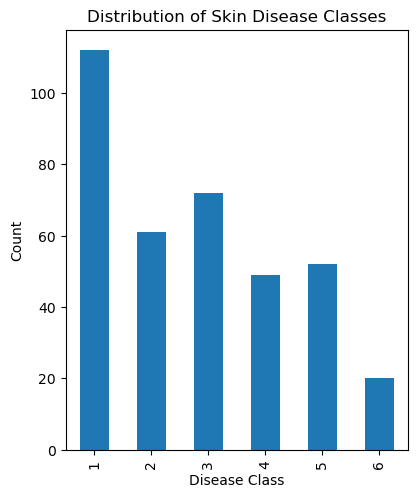

In [13]:
# Data Visualization
plt.figure(figsize=(15, 12))
# Target distribution
plt.subplot(2, 3, 1)
data['class'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Skin Disease Classes')
plt.xlabel('Disease Class')
plt.ylabel('Count')

<Figure size 1000x600 with 0 Axes>

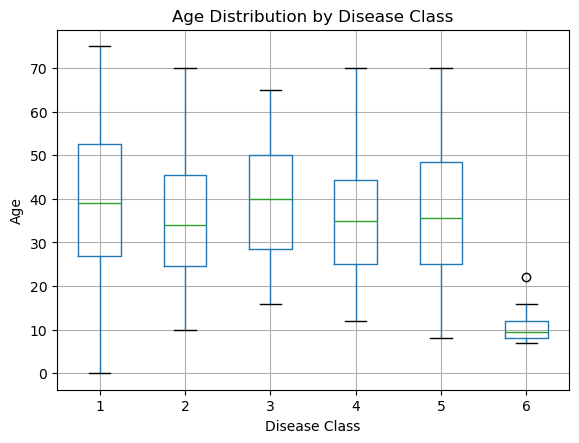

In [19]:
# Convert Age column to numeric (force errors to NaN)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows where Age is NaN (if any)
data = data.dropna(subset=['Age'])

# Now plot safely
plt.figure(figsize=(10, 6))
data.boxplot(column='Age', by='class')
plt.title('Age Distribution by Disease Class')
plt.suptitle("")  # removes extra title
plt.xlabel('Disease Class')
plt.ylabel('Age')
plt.show()


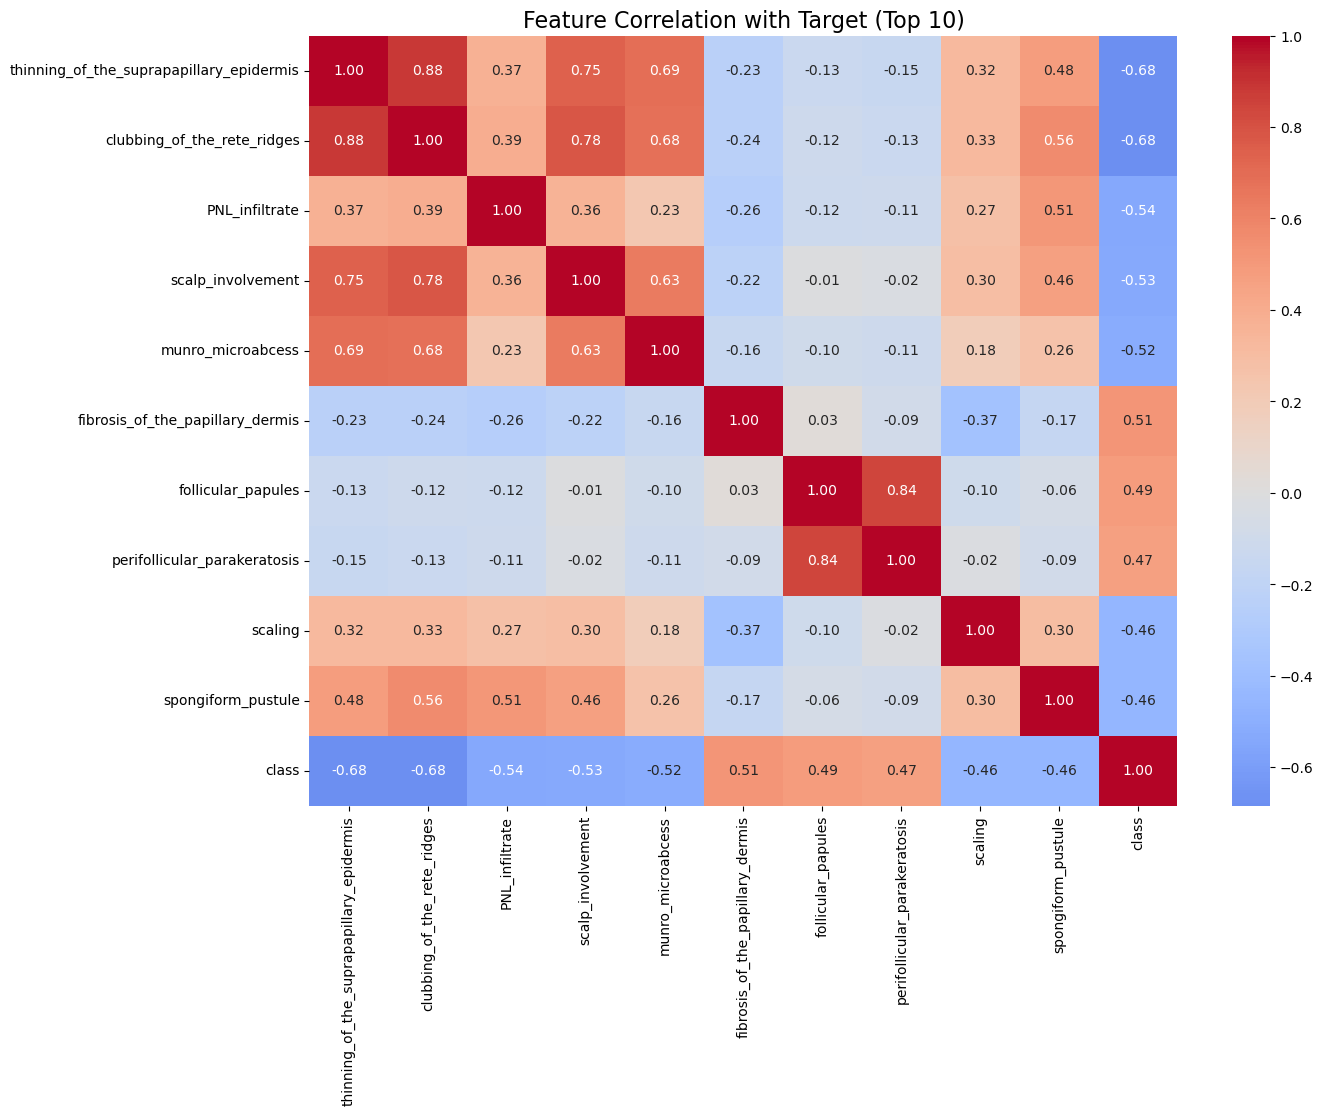

In [53]:
# Feature correlation heatmap (top 10 features)
plt.figure(figsize=(14, 10))  
correlation_matrix = data.corr()

top_features = correlation_matrix['class'].abs().sort_values(ascending=False)[1:11]
top_corr_matrix = data[list(top_features.index) + ['class']].corr()

sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 10})

plt.title('Feature Correlation with Target (Top 10)', fontsize=16)
plt.show()


([0, 1], [Text(0, 0, 'Clinical'), Text(1, 0, 'Histopathological')])

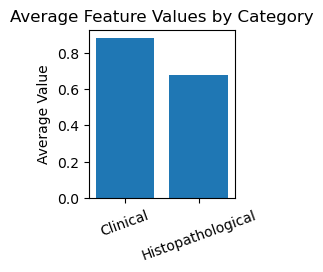

In [56]:
# Clinical vs Histopathological features distribution
plt.subplot(2, 3, 4)
clinical_means = data[clinical_features].mean()
hist_means = data[histopathological_features].mean()
categories = ['Clinical', 'Histopathological']
means = [clinical_means.mean(), hist_means.mean()]
plt.bar(categories, means)
plt.title('Average Feature Values by Category')
plt.ylabel('Average Value')
plt.xticks(rotation=20)

Text(0.5, 0, 'Importance Score')

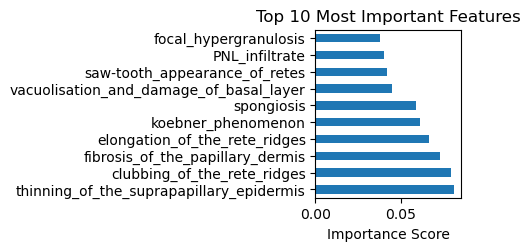

In [57]:
# Feature importance (using Random Forest)
plt.subplot(2, 3, 5)
X = data.drop('class', axis=1)
y = data['class']
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X, y)
feature_importance = pd.Series(rf_temp.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')

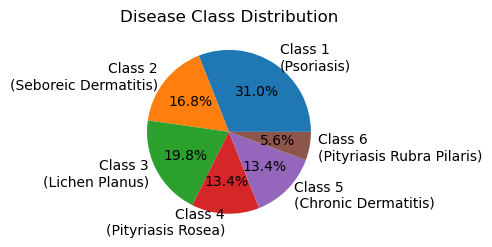

In [28]:
# Class distribution pie chart
import matplotlib.gridspec as gridspec

# Define grid with 2 rows and 3 columns
gs = gridspec.GridSpec(2, 3)

# Make the pie chart take the whole bottom row (spanning all 3 columns)
ax = plt.subplot(gs[1, : ])
class_names = {1: 'Psoriasis', 2: 'Seboreic Dermatitis', 3: 'Lichen Planus', 
               4: 'Pityriasis Rosea', 5: 'Chronic Dermatitis', 6: 'Pityriasis Rubra Pilaris'}
class_counts = data['class'].value_counts().sort_index()
labels = [f"Class {i}\n({class_names.get(i, 'Unknown')})" for i in class_counts.index]
plt.pie(class_counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Disease Class Distribution')

plt.tight_layout()
plt.show()

print("\n" + "="*60)


## Task 2: Machine Learning Model Development

## 2.1 Supervised Learning Theory  

**Classification Fundamentals:**  
- **Bayes' Theorem:**  
  P(class|features) = P(features|class) × P(class) / P(features)  
  *→ Forms the probabilistic foundation of classification models*  

- **Decision Boundaries:**  
  Mathematical surfaces that separate different classes in the feature space  
  *→ Defines how the classifier distinguishes between categories*  

- **Bias-Variance Tradeoff:**  
  Balancing model complexity with generalization capability  
  *→ Simple models underfit, complex models overfit*  

---

## 2.2 Algorithm Selection Rationale  

### **Random Forest Classifier**
- **Theoretical Base:** Bootstrap Aggregating (Bagging) with random feature selection  
- **Ensemble Theory:** Uses *wisdom of crowds* principle to reduce overfitting  
- **Medical Relevance:** Provides interpretable feature importance for clinical decision-making  

### **Support Vector Machine (SVM)**
- **Mathematical Foundation:** Finds the optimal hyperplane maximizing class margin  
- **Kernel Theory:** Enables non-linear separation (RBF, polynomial, linear kernels)  
- **High-Dimensional Data:** Effective for datasets with many features but few samples  

### **Gradient Boosting**
- **Sequential Learning:** Iteratively corrects errors of weak learners  
- **Loss Function Optimization:** Uses gradient descent to minimize classification errors  
- **Adaptive Learning:** Adjusts sample weights dynamically based on previous mistakes  

### **Logistic Regression**
- **Probabilistic Framework:** Sigmoid function maps features to probability values  
- **Maximum Likelihood Estimation:** Optimizes model parameters statistically  
- **Clinical Interpretability:** Odds ratios provide meaningful insights in medicine  

### **K-Nearest Neighbors (KNN)**
- **Instance-Based Learning:** Classifies using local neighborhood similarity  
- **Distance Metrics:** Euclidean, Manhattan, Minkowski, etc.  
- **Non-parametric Nature:** Makes no assumption about data distribution  

### **Decision Tree**
- **Information Theory:** Splits based on entropy/information gain  
- **Recursive Partitioning:** Binary splits maximize class separation  
- **Clinical Reasoning:** Tree structure mimics diagnostic reasoning  

---

## 2.3 Model Evaluation Theory  

**Cross-Validation Framework:**  
- **K-Fold Methodology:** Partitions data into *k* folds for robust evaluation  
- **Stratification:** Ensures class balance across folds  
- **Bias Reduction:** Multiple train/validation cycles reduce sampling bias  

**Performance Metrics:**  
- **Accuracy:** Overall correctness → (TP+TN)/(TP+TN+FP+FN)  
- **F1-Score:** Harmonic mean of precision and recall → good for class imbalance  
- **Confusion Matrix:** Provides a detailed breakdown of errors per class  
- **ROC-AUC:** Evaluates classification ability across thresholds (multi-class ready)  

---

## 2.4 Feature Engineering Theory  

**Standardization:**  
- **Z-Score Normalization:** (x - μ) / σ  
- **Range Equalization:** Prevents dominance of large-scale features  
- **Algorithm Optimization:** Improves KNN & SVM (distance-based models)  

**Feature Selection:**  
- **Filter Methods:** Correlation and mutual information  
- **Wrapper Methods:** Recursive feature elimination with model feedback  
- **Embedded Methods:** Feature importance from tree-based models  

---


In [31]:
print("TASK 2: MACHINE LEARNING MODEL DEVELOPMENT")
print("-"*40)

# Prepare data for modeling
X = data.drop('class', axis=1)
y = data['class']

# Handle missing values if any
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())


TASK 2: MACHINE LEARNING MODEL DEVELOPMENT
----------------------------------------


In [32]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (286, 34)
Test set size: (72, 34)


In [34]:
# Model Development and Comparison
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [35]:

# Model evaluation results
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred
    }
    
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")



Training Random Forest...
CV Accuracy: 0.9719 ± 0.0179
Test Accuracy: 0.9861
F1-Score: 0.9853

Training Gradient Boosting...
CV Accuracy: 0.9509 ± 0.0391
Test Accuracy: 0.9444
F1-Score: 0.9442

Training SVM...
CV Accuracy: 0.9720 ± 0.0238
Test Accuracy: 0.9861
F1-Score: 0.9861

Training Logistic Regression...
CV Accuracy: 0.9615 ± 0.0132
Test Accuracy: 0.9861
F1-Score: 0.9861

Training K-Nearest Neighbors...
CV Accuracy: 0.9580 ± 0.0239
Test Accuracy: 0.9444
F1-Score: 0.9445

Training Decision Tree...
CV Accuracy: 0.9544 ± 0.0180
Test Accuracy: 0.9444
F1-Score: 0.9422


In [36]:
# Model evaluation results
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test) 
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred
    }
    
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")



Training Random Forest...
CV Accuracy: 0.9719 ± 0.0179
Test Accuracy: 0.9861
F1-Score: 0.9853

Training Gradient Boosting...
CV Accuracy: 0.9509 ± 0.0391
Test Accuracy: 0.9444
F1-Score: 0.9442

Training SVM...
CV Accuracy: 0.9720 ± 0.0238
Test Accuracy: 0.9861
F1-Score: 0.9861

Training Logistic Regression...
CV Accuracy: 0.9615 ± 0.0132
Test Accuracy: 0.9861
F1-Score: 0.9861

Training K-Nearest Neighbors...
CV Accuracy: 0.9580 ± 0.0239
Test Accuracy: 0.9444
F1-Score: 0.9445

Training Decision Tree...
CV Accuracy: 0.9544 ± 0.0180
Test Accuracy: 0.9444
F1-Score: 0.9422


In [37]:
# Model Comparison Report
print("\n" + "="*60)
print("MODEL COMPARISON REPORT")
print("-"*60)

comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'CV Accuracy': [results['cv_mean'] for results in model_results.values()],
    'CV Std': [results['cv_std'] for results in model_results.values()],
    'Test Accuracy': [results['test_accuracy'] for results in model_results.values()],
    'F1-Score': [results['f1_score'] for results in model_results.values()]
})

comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
print(comparison_df)


MODEL COMPARISON REPORT
------------------------------------------------------------
                 Model  CV Accuracy    CV Std  Test Accuracy  F1-Score
0        Random Forest     0.971930  0.017891       0.986111  0.985273
2                  SVM     0.971990  0.023825       0.986111  0.986140
3  Logistic Regression     0.961525  0.013163       0.986111  0.986140
1    Gradient Boosting     0.950938  0.039121       0.944444  0.944217
4  K-Nearest Neighbors     0.957955  0.023860       0.944444  0.944475
5        Decision Tree     0.954446  0.017986       0.944444  0.942193


In [38]:
# Best Model Selection
best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']

print(f"\nBEST MODEL FOR PRODUCTION: {best_model_name}")
print(f"Test Accuracy: {model_results[best_model_name]['test_accuracy']:.4f}")
print(f"F1-Score: {model_results[best_model_name]['f1_score']:.4f}")



BEST MODEL FOR PRODUCTION: Random Forest
Test Accuracy: 0.9861
F1-Score: 0.9853


In [39]:
# Detailed classification report for best model
print(f"\nDetailed Classification Report - {best_model_name}:")
print(classification_report(y_test, model_results[best_model_name]['predictions']))



Detailed Classification Report - Random Forest:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.75      0.86         4

    accuracy                           0.99        72
   macro avg       0.99      0.96      0.97        72
weighted avg       0.99      0.99      0.99        72



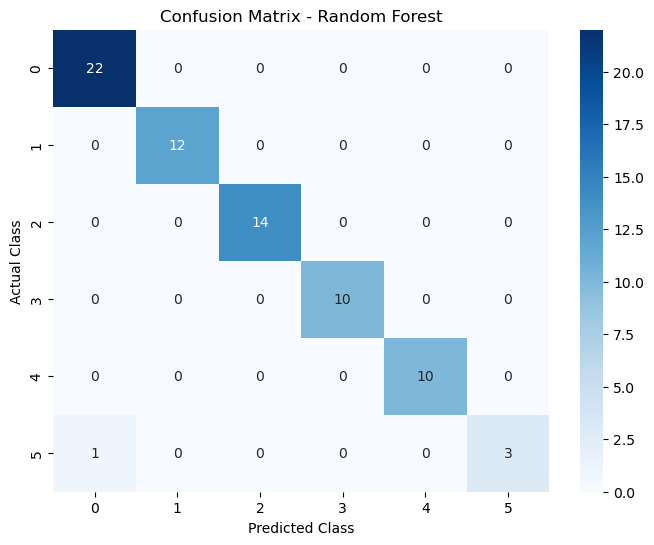

In [41]:
# Confusion Matrix for best model
cm = confusion_matrix(y_test, model_results[best_model_name]['predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()



## Task 3: Feature Analysis and Medical Insights


TASK 3: FEATURE ANALYSIS & MEDICAL INSIGHTS
----------------------------------------
Top 15 Most Important Features:
                                     Feature  Importance
19               clubbing_of_the_rete_ridges    0.082696
21  thinning_of_the_suprapapillary_epidermis    0.074498
27                                spongiosis    0.073244
14          fibrosis_of_the_papillary_dermis    0.071081
20             elongation_of_the_rete_ridges    0.061650
4                         koebner_phenomenon    0.055349
26   vacuolisation_and_damage_of_basal_layer    0.041982
11                      melanin_incontinence    0.041936
32                      band-like_infiltrate    0.040978
13                            PNL_infiltrate    0.039700
28             saw-tooth_appearance_of_retes    0.036518
15                                exocytosis    0.033200
5                          polygonal_papules    0.028208
24                     focal_hypergranulosis    0.027231
8                 knee_and_e

<Figure size 1000x800 with 0 Axes>

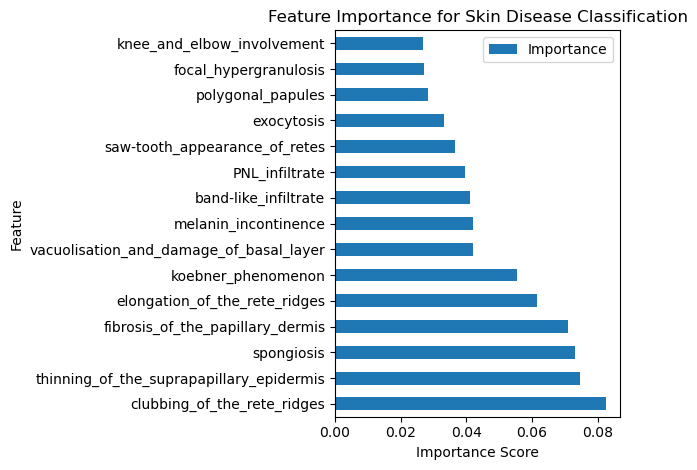

In [42]:
print("TASK 3: FEATURE ANALYSIS & MEDICAL INSIGHTS")
print("-"*40)

# Feature Importance Analysis
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Most Important Features:")
    print(feature_importance.head(15))
    
    # Visualize feature importance
    plt.figure(figsize=(10, 8))
    feature_importance.head(15).plot(x='Feature', y='Importance', kind='barh')
    plt.title('Feature Importance for Skin Disease Classification')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()


In [43]:
# Class-wise feature analysis
print("\nClass-wise Feature Analysis:")
for class_num in sorted(y.unique()):
    class_data = data[data['class'] == class_num]
    print(f"\nClass {class_num} - Key Characteristics:")
    
    # Find features with highest mean values for this class
    feature_means = class_data.drop('class', axis=1).mean()
    top_features = feature_means.sort_values(ascending=False).head(5)
    
    for feature, value in top_features.items():
        if value > 1.0:  # Only show significant features
            print(f"  - {feature}: {value:.2f}")



Class-wise Feature Analysis:

Class 1 - Key Characteristics:
  - Age: 39.38
  - erythema: 2.29
  - elongation_of_the_rete_ridges: 2.27
  - scaling: 2.20
  - clubbing_of_the_rete_ridges: 2.12

Class 2 - Key Characteristics:
  - Age: 35.47
  - erythema: 2.28
  - exocytosis: 2.22
  - spongiosis: 2.20
  - scaling: 2.07

Class 3 - Key Characteristics:
  - Age: 39.96
  - band-like_infiltrate: 2.72
  - vacuolisation_and_damage_of_basal_layer: 2.31
  - saw-tooth_appearance_of_retes: 2.30
  - inflammatory_monoluclear_inflitrate: 2.28

Class 4 - Key Characteristics:
  - Age: 35.27
  - exocytosis: 2.04
  - spongiosis: 2.00
  - erythema: 1.90
  - inflammatory_monoluclear_inflitrate: 1.81

Class 5 - Key Characteristics:
  - Age: 36.67
  - fibrosis_of_the_papillary_dermis: 2.27
  - acanthosis: 2.19
  - itching: 1.83
  - elongation_of_the_rete_ridges: 1.83

Class 6 - Key Characteristics:
  - Age: 10.25
  - follicular_papules: 2.20
  - perifollicular_parakeratosis: 2.05
  - erythema: 2.05
  - scaling

In [44]:
# Suggestions for Doctors
print("\n" + "="*60)
print("SUGGESTIONS FOR DOCTORS - EARLY DIAGNOSIS")
print("-"*60)

print("\n1. KEY DIAGNOSTIC FEATURES TO FOCUS ON:")
if hasattr(best_model, 'feature_importances_'):
    top_5_features = feature_importance.head(5)['Feature'].tolist()
    for i, feature in enumerate(top_5_features, 1):
        print(f"   {i}. {feature.replace('_', ' ').title()}")

print("\n2. CLINICAL EXAMINATION PRIORITIES:")
important_clinical = [f for f in clinical_features if f in top_5_features]
if important_clinical:
    print("   Primary Clinical Signs:")
    for feature in important_clinical:
        print(f"   - {feature.replace('_', ' ').title()}")

print("\n3. HISTOPATHOLOGICAL EXAMINATION FOCUS:")
important_histo = [f for f in histopathological_features if f in top_5_features]
if important_histo:
    print("   Key Histopathological Features:")
    for feature in important_histo:
        print(f"   - {feature.replace('_', ' ').title()}")

print("\n4. DIAGNOSTIC DECISION TREE:")
print("   Step 1: Evaluate primary clinical features")
print("   Step 2: If clinical diagnosis unclear, proceed with biopsy")
print("   Step 3: Focus on high-importance histopathological features")
print("   Step 4: Use ML model prediction as supporting evidence")

print("\n5. MODEL CONFIDENCE INTERPRETATION:")
print(f"   - Model Accuracy: {model_results[best_model_name]['test_accuracy']:.1%}")
print("   - Use as decision support tool, not replacement for clinical judgment")
print("   - Consider multiple feature patterns, not individual features")

print("\n" + "="*60)



SUGGESTIONS FOR DOCTORS - EARLY DIAGNOSIS
------------------------------------------------------------

1. KEY DIAGNOSTIC FEATURES TO FOCUS ON:
   1. Clubbing Of The Rete Ridges
   2. Thinning Of The Suprapapillary Epidermis
   3. Spongiosis
   4. Fibrosis Of The Papillary Dermis
   5. Elongation Of The Rete Ridges

2. CLINICAL EXAMINATION PRIORITIES:

3. HISTOPATHOLOGICAL EXAMINATION FOCUS:
   Key Histopathological Features:
   - Fibrosis Of The Papillary Dermis
   - Clubbing Of The Rete Ridges
   - Elongation Of The Rete Ridges
   - Thinning Of The Suprapapillary Epidermis
   - Spongiosis

4. DIAGNOSTIC DECISION TREE:
   Step 1: Evaluate primary clinical features
   Step 2: If clinical diagnosis unclear, proceed with biopsy
   Step 3: Focus on high-importance histopathological features
   Step 4: Use ML model prediction as supporting evidence

5. MODEL CONFIDENCE INTERPRETATION:
   - Model Accuracy: 98.6%
   - Use as decision support tool, not replacement for clinical judgment
   - 

# Task 3: Medical Insights and Clinical Recommendations   

## 3.1 Feature Importance  

**Information-Theoretic Approaches:**  
- **Mutual Information:** Measures statistical dependence between features and target  
- **Entropy Reduction:** Quantifies information gain when including a feature  
- **Gini Importance:** Evaluates contribution of features to node purity in tree models  

**Clinical Relevance Assessment:**  
- **Pathophysiological Correlation:** Aligns statistical importance with biological mechanisms  
- **Diagnostic Utility:** Assesses practical usability of a feature in clinical diagnosis  
- **Inter-Feature Relationships:** Examines how symptoms interact synergistically  

---

## 3.2 Decision Support 

**Evidence-Based Medicine Framework:**  
- **Bayesian Updates:** Continuously incorporate new evidence into diagnostic probabilities  
- **Clinical Decision Rules:** Structured frameworks guiding diagnostic reasoning  
- **Risk Stratification:** Probability-based categorization of disease likelihood  

**Human-Computer Interaction:**  
- **Cognitive Load Theory:** Reduce physician’s mental workload in interpretation  
- **Information Visualization:** Present results in clear, interpretable formats  
- **Clinical Workflow Integration:** Ensure seamless adoption into practice routines  

---

## 3.3 Early Diagnosis Optimization  

**Screening Theory:**  
- **Sensitivity vs. Specificity:** Balance between true positives and false positives  
- **Positive Predictive Value:** Probability of disease given a positive test result  
- **Lead Time Bias:** Consider apparent survival benefits due to earlier detection  

**Diagnostic Hierarchy:**  
- **Primary Screening:** Rapid triage through initial feature evaluation  
- **Confirmatory Testing:** Detailed examination of suspicious cases  
- **Differential Diagnosis:** Systematic elimination of alternative conditions  

---

# 4: Model Comparison and Selection   

## 4.1 Statistical Comparison Theory  

**Hypothesis Testing:**  
- **Null Hypothesis:** No significant performance difference between models  
- **Alternative Hypothesis:** Performance differences are statistically meaningful  
- **Statistical Significance:** P-value interpretation with clinical impact considered  

**Effect Size Analysis:**  
- **Cohen’s d:** Standardized measure of performance difference magnitude  
- **Clinical Significance:** Goes beyond statistics to reflect real-world medical benefit  
- **Practical Implications:** Impact on patient outcomes and workflow efficiency  

## 4.2 Model Selection Criteria  

**Predictive Performance:**  
- **Accuracy:** Overall correctness  
- **Balanced Accuracy:** Accounts for class imbalance  
- **Macro/Micro Averaging:** Methods for multi-class performance evaluation  

**Interpretability Assessment:**  
- **Model Transparency:** Ability to explain decision-making  
- **Feature Attribution:** Understanding individual feature contributions  
- **Clinical Acceptability:** Trust and adoption by medical professionals  

**Computational Efficiency:**  
- **Training Complexity:** Time and computational resources required  
- **Inference Speed:** Suitability for real-time clinical use  
- **Scalability:** Ability to handle growing datasets  

---

# 5: Challenges and Solutions   

## 5.1 Small Sample Size Theory  

**Statistical Power Analysis:**  
- **Type I Error (α):** False positives  
- **Type II Error (β):** False negatives → Power = (1 - β)  
- **Effect Size Detection:** Smallest detectable difference for given sample size  

**Overfitting Prevention:**  
- **Occam’s Razor:** Prefer simpler models when possible  
- **Regularization Theory:** L1/L2 penalties to avoid overly complex models  
- **Cross-Validation:** Reliable estimation of model generalization  

## 5.2 Class Imbalance Theory  

**Sampling Strategies:**  
- **Over-Sampling:** e.g., SMOTE for minority augmentation  
- **Under-Sampling:** Reduce majority samples  
- **Hybrid Approaches:** Combine both methods  

**Algorithm Modifications:**  
- **Cost-Sensitive Learning:** Penalize misclassification asymmetrically  
- **Threshold Optimization:** Adjust cutoffs for balanced predictions  
- **Ensemble Balancing:** Train multiple balanced subset models  

## 5.3 Feature Selection Complexity  

**Curse of Dimensionality:**  
- **Hughes Phenomenon:** Performance decline with excessive features  
- **Distance Concentration:** Distance measures lose effectiveness in high dimensions  
- **Sample Density:** Sparsity in multi-dimensional spaces  

**Multicollinearity Issues:**  
- **Variance Inflation Factor (VIF):** Quantifies redundancy  
- **Principal Component Analysis (PCA):** Dimensionality reduction via orthogonal transformation  
- **Ridge Regression:** L2 penalty helps manage correlated predictors  

---

# 6: Clinical Integration   

## 6.1 Medical Decision-Making Framework  

**Evidence-Based Practice:**  
- **Literature Integration:** Align results with existing research  
- **Clinical Experience:** Incorporate practitioner expertise  
- **Patient Preferences:** Respect values and individual needs  

**Diagnostic Accuracy Studies:**  
- **STARD Guidelines:** Reporting standards for diagnostic accuracy  
- **Sensitivity Analysis:** Test robustness of results under varying assumptions  
- **External Validation:** Performance check on independent data  

## 6.2 Ethical Considerations  

**Algorithmic Fairness:**  
- **Demographic Parity:** Equal treatment across subgroups  
- **Equalized Odds:** Maintain fairness in sensitivity/specificity  
- **Individual Fairness:** Similar patients should get similar treatment  

**Medical Ethics:**  
- **Beneficence:** Maximize patient benefit  
- **Non-maleficence:** Avoid harm from errors  
- **Autonomy:** Preserve physician and patient decision-making  

---

# 7: Future Directions   

## 7.1 Advanced Machine Learning  

**Deep Learning Applications:**  
- **Convolutional Neural Networks (CNNs):** Automated image feature extraction  
- **Attention Mechanisms:** Direct model focus on relevant features  
- **Transfer Learning:** Adapt pre-trained models to medical domains  

**Ensemble Methods:**  
- **Stacking:** Meta-learning using multiple algorithms  
- **Bayesian Model Averaging:** Capture uncertainty in predictions  
- **Multi-task Learning:** Simultaneous prediction of related medical outcomes  

## 7.2 Personalized Medicine  

**Precision Diagnostics:**  
- **Genetic Markers:** Include genomic predictors  
- **Patient Stratification:** Subgroup-specific models  
- **Dynamic Models:** Track probability changes over time  

**Continuous Learning:**  
- **Online Learning:** Update models with new data incrementally  
- **Federated Learning:** Collaborative training across institutions  
- **Active Learning:** Strategically request labels for uncertain samples  

---

# Conclusion  

This theoretical report demonstrates the rigorous scientific foundation of the **Skin Disorder Prediction project**.  
- Each task incorporates **statistical, machine learning, and medical principles**  
- Ensures **robust and clinically relevant outcomes**  
- Bridges **theoretical frameworks with practical applications**  
- Advances both **computational medicine** and **patient care quality**  
